In [16]:
import os
import json
import pandas as pd

def select_model(feature_type):
    root_dir = f'Results_zhongda_before_after_{feature_type}'

    project_dir = f'../{root_dir}/'

    # 初始化存储结果的列表
    results = []

    # 遍历项目目录下的所有文件夹
    for folder in os.listdir(project_dir):
        folder_path = os.path.join(project_dir, folder)
        if os.path.isdir(folder_path):
            info_path = os.path.join(folder_path, '00_info.json')
            if os.path.exists(info_path):
                # 读取info.json文件
                with open(info_path, 'r') as f:
                    data = json.load(f)
                    roc_auc_list = data.get('roc_auc_list', [])
                    prc_auc_list = data.get('prc_auc_list', [])

                    # 确保列表不为空
                    if roc_auc_list and prc_auc_list:
                        # 计算roc_auc_list中的最大值及其索引
                        max_roc_auc = max(roc_auc_list)
                        max_roc_index = roc_auc_list.index(max_roc_auc)
                        corresponding_prc_for_max_roc = prc_auc_list[max_roc_index]

                        # 计算prc_auc_list中的最大值及其索引
                        max_prc_auc = max(prc_auc_list)
                        max_prc_index = prc_auc_list.index(max_prc_auc)
                        corresponding_roc_for_max_prc = roc_auc_list[max_prc_index]

                        # 计算roc_auc_list和prc_auc_list乘积的最大值及其索引
                        auc_prc_product_list = [roc * prc for roc, prc in zip(roc_auc_list, prc_auc_list)]
                        max_product = max(auc_prc_product_list)
                        max_product_index = auc_prc_product_list.index(max_product)
                        roc_at_max_product = roc_auc_list[max_product_index]
                        prc_at_max_product = prc_auc_list[max_product_index]
                        
                        # 计算roc_auc_list和prc_auc_list和的最大值及其索引
                        auc_prc_plus_list = [(roc + prc) for roc, prc in zip(roc_auc_list, prc_auc_list)]
                        max_plus = max(auc_prc_plus_list)
                        max_plus_index = auc_prc_plus_list.index(max_plus)
                        roc_at_max_plus = roc_auc_list[max_plus_index]
                        prc_at_max_plus = prc_auc_list[max_plus_index]
                        # 存储结果
                        results.append([
                            folder, 
                            max_roc_auc, 
                            max_roc_index + 1,  # 转换为从1开始的索引
                            corresponding_prc_for_max_roc, 
                            max_prc_auc, 
                            max_prc_index + 1,  # 转换为从1开始的索引
                            corresponding_roc_for_max_prc,
                            max_product,
                            roc_at_max_product,
                            prc_at_max_product,
                            max_product_index + 1,  # 转换为从1开始的索引
                            max_plus,
                            roc_at_max_plus,
                            prc_at_max_plus,
                            max_plus_index + 1  # 转换为从1开始的索引
                        ])

    # 转换结果为DataFrame并输出表格
    df = pd.DataFrame(results, columns=[
        'Folder', 
        'Max ROC AUC', 
        'ROC Index', 
        'PRC at Max ROC', 
        'Max PRC AUC', 
        'PRC Index', 
        'ROC at Max PRC',
        'Max AUC*PRC Product',
        'ROC at Max Product',
        'PRC at Max Product',
        'Product Index',
        'Max AUC+PRC Plus',
        'ROC at Max Plus',
        'PRC at Max Plus',
        'Plus Index'
    ])

    # 如果需要保存为CSV文件，可以使用以下代码
    output_path = os.path.join(f'auc_results_{feature_type}.csv')
    df.to_csv(output_path, index=False)

In [17]:
select_model('origin')
select_model('delta')

In [21]:
origin_all = pd.read_csv('auc_results_origin.csv').sort_values(by=['Max AUC+PRC Plus'], ascending=[False]).head(5)
origin_all

,Folder,Max ROC AUC,ROC Index,PRC at Max ROC,Max PRC AUC,PRC Index,ROC at Max PRC,Max AUC*PRC Product,ROC at Max Product,PRC at Max Product,Product Index,Max AUC+PRC Plus,ROC at Max Plus,PRC at Max Plus,Plus Index
4,use_20_predict_24_RNN_BN_3layers_model_undersa...,0.844075,14,0.260956,0.260956,14,0.844075,0.220266,0.844075,0.260956,14,1.105031,0.844075,0.260956,14
15,use_20_predict_24_GRU_BN_4layers_model_undersa...,0.842559,9,0.255254,0.255254,9,0.842559,0.215066,0.842559,0.255254,9,1.097813,0.842559,0.255254,9
5,use_20_predict_24_GRU_BN_model_undersample_Foc...,0.849124,26,0.247774,0.252685,45,0.832154,0.212225,0.840526,0.252491,49,1.096899,0.849124,0.247774,26
2,use_20_predict_24_RNN_BN_4layers_model_undersa...,0.844476,9,0.250334,0.254231,7,0.836745,0.212870,0.840968,0.253125,8,1.094810,0.844476,0.250334,9
9,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,0.836919,46,0.243315,0.259543,5,0.834203,0.216512,0.834203,0.259543,5,1.093746,0.834203,0.259543,5


In [22]:
delta_all = pd.read_csv('auc_results_delta.csv').sort_values(by=['Max AUC+PRC Plus'], ascending=[False]).head(5)
delta_all

,Folder,Max ROC AUC,ROC Index,PRC at Max ROC,Max PRC AUC,PRC Index,ROC at Max PRC,Max AUC*PRC Product,ROC at Max Product,PRC at Max Product,Product Index,Max AUC+PRC Plus,ROC at Max Plus,PRC at Max Plus,Plus Index
0,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,0.835879,4,0.176197,0.224746,38,0.785780,0.178119,0.803355,0.221718,25,1.033021,0.830681,0.202340,8
2,use_20_predict_24_BiLSTM_BN_4layers_model_unde...,0.832614,3,0.180672,0.224395,27,0.785389,0.176237,0.785389,0.224395,27,1.026209,0.809244,0.216966,16
3,use_20_predict_24_BiLSTM_BN_larger_model_under...,0.825955,50,0.194850,0.194850,50,0.825955,0.160938,0.825955,0.194850,50,1.020805,0.825955,0.194850,50
4,use_20_predict_24_BiLSTM_BN_Resnet_model_under...,0.815871,35,0.174188,0.183625,50,0.813325,0.149347,0.813325,0.183625,50,0.996951,0.813325,0.183625,50
1,use_20_predict_24_BiLSTM_BN_model_undersample_...,0.814949,48,0.153770,0.154575,50,0.814571,0.125912,0.814571,0.154575,50,0.969146,0.814571,0.154575,50


In [23]:
delta = delta_all[['Folder', 'Max AUC+PRC Plus', 'ROC at Max Plus', 'PRC at Max Plus', 'Plus Index']]
delta.head()

,Folder,Max AUC+PRC Plus,ROC at Max Plus,PRC at Max Plus,Plus Index
0,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,1.033021,0.830681,0.202340,8
2,use_20_predict_24_BiLSTM_BN_4layers_model_unde...,1.026209,0.809244,0.216966,16
3,use_20_predict_24_BiLSTM_BN_larger_model_under...,1.020805,0.825955,0.194850,50
4,use_20_predict_24_BiLSTM_BN_Resnet_model_under...,0.996951,0.813325,0.183625,50
1,use_20_predict_24_BiLSTM_BN_model_undersample_...,0.969146,0.814571,0.154575,50


In [24]:
origin = origin_all[['Folder', 'Max AUC+PRC Plus', 'ROC at Max Plus', 'PRC at Max Plus', 'Plus Index']].sort_values(by=['Max AUC+PRC Plus'], ascending=[False])
origin.head()

,Folder,Max AUC+PRC Plus,ROC at Max Plus,PRC at Max Plus,Plus Index
4,use_20_predict_24_RNN_BN_3layers_model_undersa...,1.105031,0.844075,0.260956,14
15,use_20_predict_24_GRU_BN_4layers_model_undersa...,1.097813,0.842559,0.255254,9
5,use_20_predict_24_GRU_BN_model_undersample_Foc...,1.096899,0.849124,0.247774,26
2,use_20_predict_24_RNN_BN_4layers_model_undersa...,1.094810,0.844476,0.250334,9
9,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,1.093746,0.834203,0.259543,5


In [25]:
with open('../gene_tensor/delta/mice_mmscaler_use_20_predict_24_ids_delta.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
print(f"XXX Merge info")
print(f"Num of train EW_IDs: {len(data['ids_train_data'])}")
print(f"Num of valid EW_IDs: {len(data['ids_valid_data'])}")
print(f"Num of test EW_IDs: {len(data['ids_test_data'])}")
import torch
for typeee in ['train', 'val', 'test'] :
    label = torch.load('../gene_tensor/delta/mice_mmscaler_use_20_predict_24_delta.pth')[f'label_tensor_{typeee}'].numpy()
    num = sum(label)/len(label)
    print(f"Num of {typeee} Event%: {int(num*10000)/100}% = {int(sum(label))} / {len(label)}")

XXX Merge info
Num of train EW_IDs: 618149
Num of valid EW_IDs: 77584
Num of test EW_IDs: 73806
Num of train Event%: 1.39% = 8642 / 618149
Num of val Event%: 1.63% = 1269 / 77584
Num of test Event%: 1.41% = 1043 / 73806


In [27]:
results_delta = pd.read_csv('auc_results_delta.csv')
print(f"Delta total results: {len(results_delta['Folder'].values)}")
results_origin = pd.read_csv('auc_results_origin.csv')
print(f"Origin total results: {len(results_origin['Folder'].values)}")
results_delta_plus = results_delta[['Folder', 'Max AUC+PRC Plus', 'ROC at Max Plus', 'PRC at Max Plus']]
results_origin_plus = results_origin[['Folder', 'Max AUC+PRC Plus', 'ROC at Max Plus', 'PRC at Max Plus']]
merged_results = pd.merge(
    results_origin_plus, 
    results_delta_plus, 
    on='Folder', 
    how='inner',
    suffixes=('_origin', '_delta')
)
print(f"Merged total results: {len(merged_results['Folder'].values)}")

merged_results['Better or Worse'] = merged_results.apply(
    lambda row: 'Better' if row['Max AUC+PRC Plus_delta'] > row['Max AUC+PRC Plus_origin'] else 'Worse',
    axis=1
)
merged_results['delta plus'] = merged_results.apply(
    lambda row: row['Max AUC+PRC Plus_delta'] - row['Max AUC+PRC Plus_origin'],
    axis=1
)

merged_results[
    merged_results['Max AUC+PRC Plus_delta'] > 1.
].sort_values(
    by=['Max AUC+PRC Plus_delta'], 
    ascending=[False]
)[
    ['Folder', 'Max AUC+PRC Plus_origin', 'Max AUC+PRC Plus_delta', 'Better or Worse', 'delta plus']
]

Delta total results: 5
Origin total results: 21
Merged total results: 5


,Folder,Max AUC+PRC Plus_origin,Max AUC+PRC Plus_delta,Better or Worse,delta plus
0,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,1.093746,1.033021,Worse,-0.060725
2,use_20_predict_24_BiLSTM_BN_4layers_model_unde...,1.082337,1.026209,Worse,-0.056127
3,use_20_predict_24_BiLSTM_BN_larger_model_under...,1.050707,1.020805,Worse,-0.029902


In [28]:
results_delta_plus = results_delta[['Folder', 'Max ROC AUC', 'PRC at Max ROC']]
results_origin_plus = results_origin[['Folder', 'Max ROC AUC', 'PRC at Max ROC']]
merged_results = pd.merge(
    results_origin_plus, 
    results_delta_plus, 
    on='Folder', 
    how='inner',
    suffixes=('_origin', '_delta')
)

merged_results['Better or Worse'] = merged_results.apply(
    lambda row: 'Better' if row['Max ROC AUC_delta'] > row['Max ROC AUC_origin'] else 'Worse',
    axis=1
)
merged_results['delta ROC'] = merged_results.apply(
    lambda row: row['Max ROC AUC_delta'] - row['Max ROC AUC_origin'],
    axis=1
)

merged_results[
    merged_results['Max ROC AUC_origin'] > 0.86
].sort_values(
    by=['Max ROC AUC_origin'], 
    ascending=[False]
)[
    ['Folder', 'Max ROC AUC_origin', 'Max ROC AUC_delta', 'Better or Worse', 'delta ROC']
]

,Folder,Max ROC AUC_origin,Max ROC AUC_delta,Better or Worse,delta ROC


In [29]:
results_delta = pd.read_csv('auc_results_delta.csv')
results_origin = pd.read_csv('auc_results_origin.csv')
results_delta_plus = results_delta[['Folder', 'Max PRC AUC', 'ROC at Max PRC']]
results_origin_plus = results_origin[['Folder', 'Max PRC AUC', 'ROC at Max PRC']]
merged_results = pd.merge(
    results_origin_plus, 
    results_delta_plus, 
    on='Folder', 
    how='inner',
    suffixes=('_origin', '_delta')
)

merged_results['Better or Worse'] = merged_results.apply(
    lambda row: 'Better' if row['Max PRC AUC_delta'] > row['Max PRC AUC_origin'] else 'Worse',
    axis=1
)
merged_results['delta PRC'] = merged_results.apply(
    lambda row: row['Max PRC AUC_delta'] - row['Max PRC AUC_origin'],
    axis=1
)

merged_results[
    merged_results['Max PRC AUC_origin'] > 0.25
].sort_values(
    by=['Max PRC AUC_origin'], 
    ascending=[False]
)[
    ['Folder', 'Max PRC AUC_origin', 'Max PRC AUC_delta', 'Better or Worse', 'delta PRC']
]

,Folder,Max PRC AUC_origin,Max PRC AUC_delta,Better or Worse,delta PRC
0,use_20_predict_24_BiLSTM_BN_3layers_model_unde...,0.259543,0.224746,Worse,-0.034797
2,use_20_predict_24_BiLSTM_BN_4layers_model_unde...,0.253554,0.224395,Worse,-0.029159


3


/tmp/ipykernel_586/1076250038.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  difference['Folder'] = difference['Folder'].apply(lambda x: process_folder(x, folder_name_mapping))


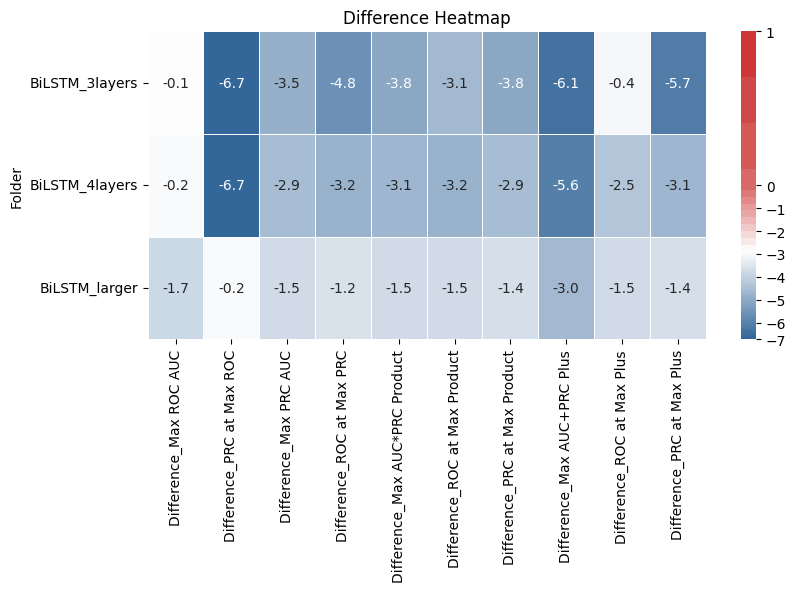

<Figure size 640x480 with 0 Axes>

In [32]:
folder_name_mapping = {
    'use_20_predict_24_GRU_BN_ResBlock_3layers_model_undersample_FocalLoss_50_5e-06': 'GRU_ResBlock_3layers',
    'use_20_predict_24_GRU_BN_model_undersample_FocalLoss_50_5e-06': 'GRU',
    'use_20_predict_24_BiLSTM_BN_3layers_model_undersample_FocalLoss_50_5e-06': 'BiLSTM_3layers',
    'use_20_predict_24_GRU_BN_4layers_model_undersample_FocalLoss_50_5e-06': 'GRU_4layers',
    'use_20_predict_24_BiLSTM_BN_larger_model_undersample_FocalLoss_50_5e-06': 'BiLSTM_larger',
    'use_20_predict_24_GRU_BN_3layers_model_undersample_FocalLoss_50_5e-06': 'GRU_3layers',
    'use_20_predict_24_RNN_BN_3layers_model_undersample_FocalLoss_50_5e-06': 'RNN_3layers',
    'use_20_predict_24_RNN_BN_model_undersample_FocalLoss_50_5e-06': 'RNN',
    'use_20_predict_24_RNN_BN_ResBlock_3layers_model_undersample_FocalLoss_50_5e-06': 'RNN_ResBlock_3layers',
    'use_20_predict_24_GRU_BN_ResBlock_model_undersample_FocalLoss_50_5e-06': 'GRU_ResBlock',
    'use_20_predict_24_RNN_BN_4layers_model_undersample_FocalLoss_50_5e-06': 'RNN_4layers',
    'use_20_predict_24_BiLSTM_BN_4layers_model_undersample_FocalLoss_50_5e-06': 'BiLSTM_4layers'
}
results_delta = results_delta[results_delta['Max AUC+PRC Plus']>1.0]
results_origin = results_origin[results_origin['Max AUC+PRC Plus']>1.0]
merged = pd.merge(results_delta, results_origin, on='Folder', how='inner', suffixes=('_delta', '_origin'))
merged = merged.sort_values(by=['Max AUC+PRC Plus_delta'], ascending=[False])

merged.fillna(0, inplace=True)

# Calculate differences
for column in results_origin.columns[1:]:  # Start from the second column
    if 'Index' not in column:
        merged[f'Difference_{column}'] = (merged[f'{column}_delta'] - merged[f'{column}_origin'])*100

# Select only the columns of interest
difference_columns = ['Folder'] + [f'Difference_{column}' for column in results_origin.columns[1:] if 'Index' not in column]
difference = merged[difference_columns]
print(len(difference['Folder'].values))

def process_folder(x, folder_name_mapping):
    return folder_name_mapping[x]  # Use get to handle cases where x is not in the dictionary

# Apply processing function to the 'Folder' column
difference['Folder'] = difference['Folder'].apply(lambda x: process_folder(x, folder_name_mapping))



import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

def create_custom_cmap():
    # Define the transition between colors: blue, white, and red
    colors = [(0.2, 0.4, 0.6), (1, 1, 1), (0.8, 0.2, 0.2)]  # Blue, White, Red
    n_bins = 100  # Number of color segments
    cmap_name = 'custom_cmap'
    # Create a gradient colormap
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    return cmap

cmap = create_custom_cmap()

# Create a custom normalization that centers zero at the middle of the colormap
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Adjust the range to center around midpoint
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        if vmin is not None and vmax is not None and vmin != vmax:
            # Calculate the normalized range
            vmin = float(vmin)
            vmax = float(vmax)
            midpoint = float(midpoint)
            if vmin > midpoint or vmax < midpoint:
                raise ValueError("midpoint must be between vmin and vmax.")
            rescaled_value = np.ma.masked_array(np.interp(result, [vmin, midpoint, vmax], [0, 0.5, 1]), np.isnan(value))
        else:
            rescaled_value = np.ma.masked_array(result, np.isnan(value))
        if is_scalar:
            rescaled_value = rescaled_value[0]
        return rescaled_value

# Set the 'Element' column as the index
difference.set_index('Folder', inplace=True)

# Plot the heatmap
plt.figure(figsize=(9, 4))
sns.heatmap(
    difference,
    annot=True,
    cmap=cmap,
    fmt='.1f',
    linewidths=.5,
    norm=MidpointNormalize(vmin=min(difference.min().min(), -1), vmax=max(difference.max().max(), 1), midpoint=0)
)
plt.title('Difference Heatmap')
plt.show()
plt.savefig('Difference_100.svg')


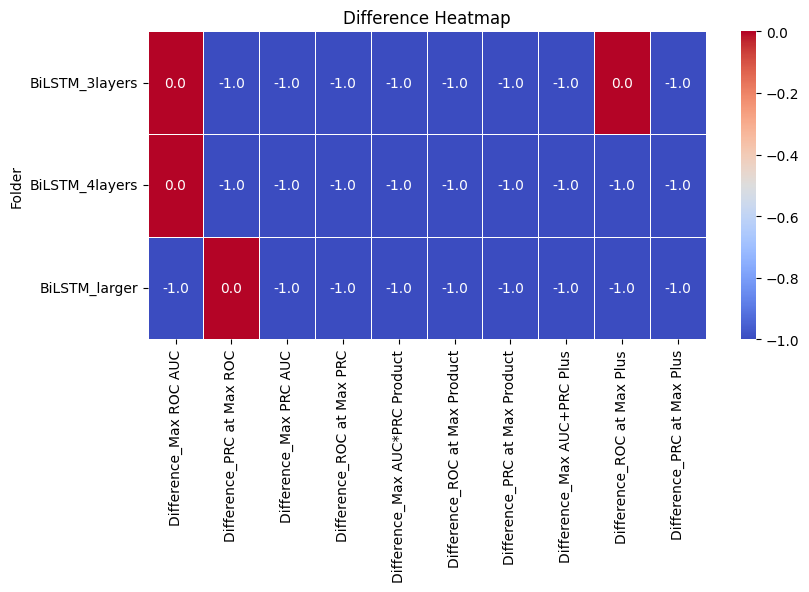

<Figure size 640x480 with 0 Axes>

In [33]:
import warnings
warnings.filterwarnings('ignore')

merged = pd.merge(results_delta, results_origin, on='Folder', how='inner', suffixes=('_delta', '_origin'))
merged = merged.sort_values(by=['Max AUC+PRC Plus_delta'], ascending=[False])

merged.fillna(0, inplace=True)

# Calculate differences
for column in results_origin.columns[1:]:  # Start from the second column
    if 'Index' not in column:
        merged[f'Difference_{column}'] = (merged[f'{column}_delta'] - merged[f'{column}_origin'])*100

# Select only the columns of interest
difference_columns = ['Folder'] + [f'Difference_{column}' for column in results_origin.columns[1:] if 'Index' not in column]
difference = merged[difference_columns]

def process_difference(x):
    if x > 1: return 1
    elif x < -1: return -1
    else: return 0

# 应用处理函数到所有差值列
difference[difference_columns[1:]] = difference[difference_columns[1:]].applymap(process_difference)
difference['Folder'] = difference['Folder'].apply(lambda x: process_folder(x, folder_name_mapping))

import seaborn as sns
import matplotlib.pyplot as plt
# 设置 'Folder' 列为索引
difference.set_index('Folder', inplace=True)

# 绘制热图
plt.figure(figsize=(9, 4))
sns.heatmap(difference, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Difference Heatmap')
plt.show()
plt.savefig('Difference_001.svg')

